In [1]:
from urllib.request import urlretrieve

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

# You can now download the data from the database
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x205105fe4e0>)

In [6]:
# we can use some bash commands in jupyter with the ! before the command
!head Fremont.csv
#!head ./bikedata/Fremont.csv

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv')
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [7]:
data = pd.read_csv('Fremont.csv', index_col='Date')
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
10/03/2012 12:00:00 AM,9.0,4.0
10/03/2012 01:00:00 AM,6.0,4.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 03:00:00 AM,3.0,2.0
10/03/2012 04:00:00 AM,1.0,6.0


In [8]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


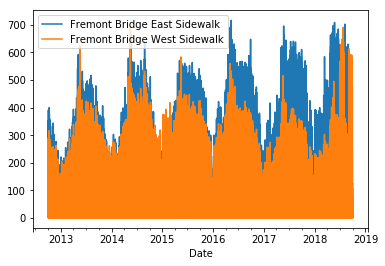

In [9]:
%matplotlib inline 
data.plot()

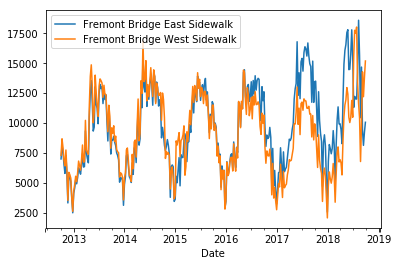

In [10]:
data.resample('W').sum().plot()

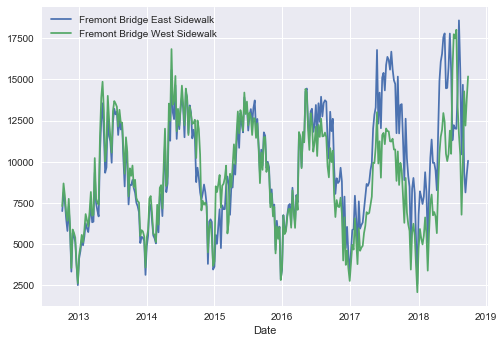

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn') #seaborn is a differnt style
data.resample('W').sum().plot();

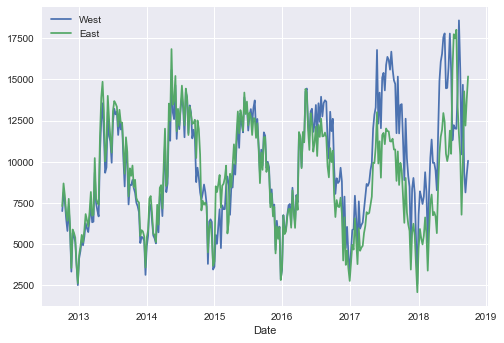

In [12]:
data.columns = ['West', 'East'] 
data.resample('W').sum().plot()

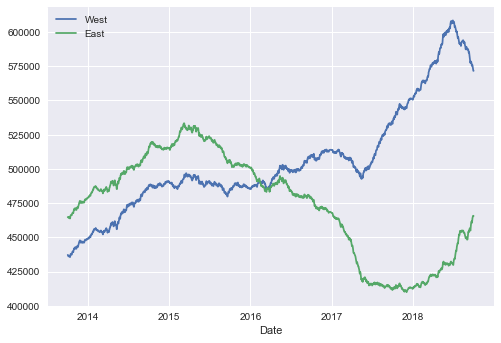

In [13]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 618365.35)

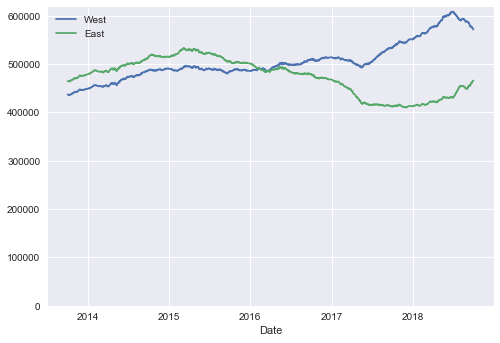

In [14]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) 

(0, 1080850.45)

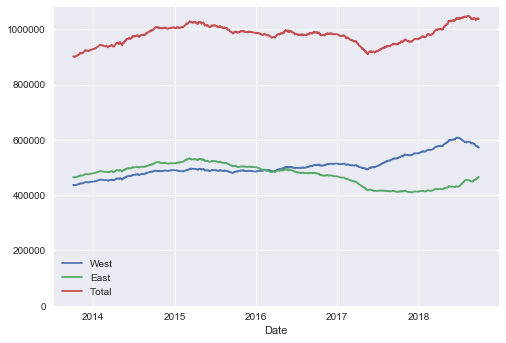

In [15]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) 

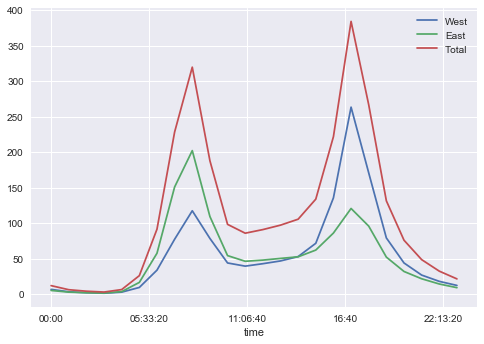

In [16]:
data.groupby(data.index.time).mean().plot()

In [31]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


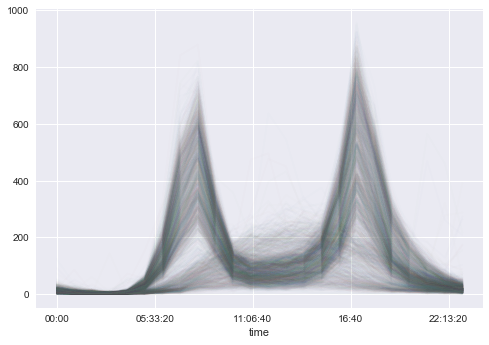

In [33]:
pivoted.plot(legend=False, alpha=0.01)

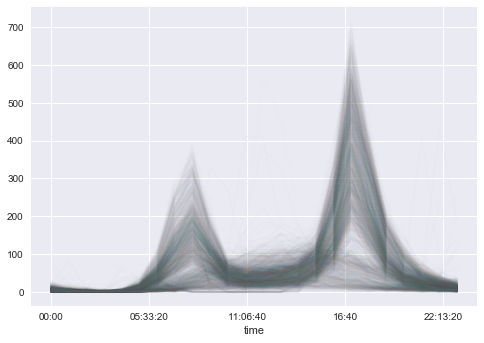

In [34]:
pivoted_West = data.pivot_table('West', index = data.index.time, columns=data.index.date)
pivoted_West.plot(legend=False, alpha=0.01)